# Entries

In [1]:
!pip install yfinance --upgrade --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 17.9 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 241.1 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-cp310-cp310-linux_x86_64.whl size=317865 sha256=f7a731e131ec2f116fe8a663d4ea684567fe473496bbb45bed7f5d4e478c6553
  Stored in directory: /tmp/pip-ephem-wheel-cache-2sjd16x4/wheels/75/79/e5/8838db0594cc6c587142fd2563356392ade6255c5930411069
Successfully built peewee


In [40]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Strategy and methodology

[*********************100%***********************]  1 of 1 completed


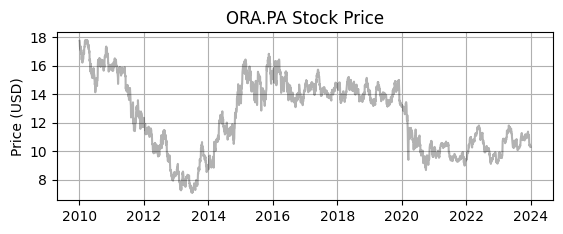

In [41]:
ticker = 'ORA.PA'
stock_data = yf.download(ticker, start='2010-01-01', end='2024-01-01')
plt.subplot(2, 1, 1)
plt.plot(stock_data['Close'], label='Close Price', color='black', alpha=0.3)
plt.title(f'{ticker} Stock Price')
plt.ylabel('Price (USD)')
plt.grid()

In [42]:
stock_data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ORA.PA,ORA.PA,ORA.PA,ORA.PA,ORA.PA,ORA.PA
Date,,,,,,
2010-01-04,6.855805,17.760000,17.775000,17.559999,17.680000,6426321
2010-01-05,6.840365,17.719999,17.780001,17.639999,17.745001,5699622
2010-01-06,6.819134,17.665001,17.780001,17.629999,17.770000,11488328
2010-01-07,6.734207,17.445000,17.674999,17.334999,17.660000,16110580
2010-01-08,6.689815,17.330000,17.530001,17.200001,17.495001,9363069
...,...,...,...,...,...,...
2023-12-21,10.044047,10.446000,10.468000,10.410000,10.450000,2987831
2023-12-22,10.069046,10.472000,10.512000,10.456000,10.468000,2127692


In [43]:
def RSI(Ticker,start_date,end_date,upper_bound,lower_bound,window): 
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    df=pd.DataFrame(stock_data)
    df["difference"]=df["Close"].diff()
    df['gain']=np.where(df["difference"]>0,df["difference"],0)
    df['loss']=np.where(df["difference"]<0,df["difference"],0)
    df['Avgerage Gain'] = df['gain'].rolling(window=window).mean()
    df['Avgerage Loss'] = df['loss'].rolling(window=window).mean()
    df["RS"]=df['Avgerage Gain']/df['Avgerage Loss']
    df["RSI"]=100-(100/(1+np.abs(df["RS"])))
    return df
    

In [44]:
def Courbe_RSI (Ticker,start_date,end_date,upper_bound,lower_bound,window):
    Ticker=Ticker
    df=RSI(Ticker,start_date,end_date,upper_bound,lower_bound,window)
    plt.plot(df['RSI'], label='RSI', color='orange', alpha=0.7)
    plt.axhline(lower_bound, color='green', linestyle='--', label='Oversold (Buy) Threshold')
    plt.axhline(upper_bound, color='red', linestyle='--', label='Overbought (Sell) Threshold')
    plt.fill_between(df.index, 0, lower_bound, color='green', alpha=0.1)
    plt.fill_between(df.index, upper_bound, 100, color='red', alpha=0.1)
    plt.title(f'{ticker} RSI Indicator')
    plt.ylabel('RSI')
    plt.legend()
    plt.grid()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


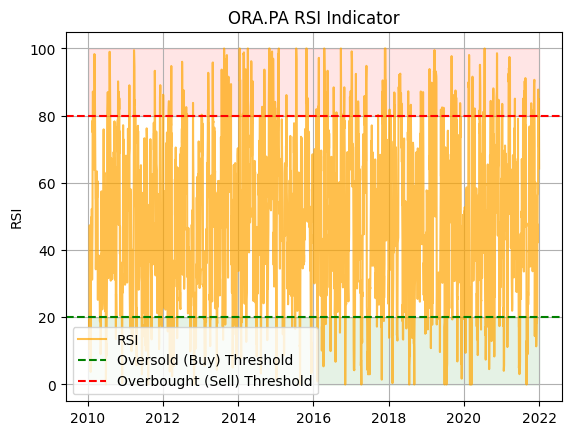

In [45]:
Courbe_RSI('ORA.PA','2010-01-01','2022-01-01',80,20,7)
df=RSI('ORA.PA','2010-01-01','2022-01-01',80,20,7)

In [46]:
df.head(14)

Price,Adj Close,Close,High,Low,Open,Volume,difference,gain,loss,Avgerage Gain,Avgerage Loss,RS,RSI
Ticker,ORA.PA,ORA.PA,ORA.PA,ORA.PA,ORA.PA,ORA.PA,,,,,,,
Date,,,,,,,,,,,,,
2010-01-04,6.855805,17.760000,17.775000,17.559999,17.680000,6426321,NaN,0.000,0.000000,NaN,NaN,NaN,NaN
2010-01-05,6.840365,17.719999,17.780001,17.639999,17.745001,5699622,-0.040001,0.000,-0.040001,NaN,NaN,NaN,NaN
2010-01-06,6.819132,17.665001,17.780001,17.629999,17.770000,11488328,-0.054998,0.000,-0.054998,NaN,NaN,NaN,NaN
2010-01-07,6.734207,17.445000,17.674999,17.334999,17.660000,16110580,-0.220001,0.000,-0.220001,NaN,NaN,NaN,NaN
2010-01-08,6.689816,17.330000,17.530001,17.200001,17.495001,9363069,-0.115000,0.000,-0.115000,NaN,NaN,NaN,NaN
2010-01-11,6.676303,17.295000,17.400000,17.150000,17.400000,9106764,-0.035000,0.000,-0.035000,NaN,NaN,NaN,NaN
2010-01-12,6.697535,17.350000,17.450001,17.235001,17.350000,7987409,0.055000,0.055,0.000000,0.007857,-0.066429,-0.118280,10.576972
2010-01-13,6.718768,17.405001,17.559999,17.350000,17.400000,7343169,0.055000,0.055,0.000000,0.015714,-0.066429,-0.236560,19.130516


# BackTesting

In [47]:
def All_Data(ticker,start_date,end_date,upper_bound,lower_bound,window):
    
    ticker=ticker
    upper_bound=upper_bound
    lower_bound=lower_bound
    window=window
    
    df=RSI(ticker,start_date,end_date,upper_bound,lower_bound,window)

    # moyenne mobile pour le volume
    df['Volume MA'] = df['Volume'].rolling(window=window).mean()
    
    x=int(df['Volume'].mean())
    
    df['Volume MA'] = df['Volume MA'].fillna(x)  # Remplir les NaN

    df['Volume'] = df['Volume'].astype(float)
    df['Volume MA'] = df['Volume MA'].astype(float)
    
    volume_list = df['Volume'][ticker].tolist()
    volume_ma_list = df['Volume MA'].tolist()
    v_sup_vma = []

    for vol, vol_ma in zip(volume_list, volume_ma_list):
        v_sup_vma.append(1 if vol > vol_ma else 0)
    
    df['V_sup_vma'] = v_sup_vma

    df['Price MA'] = df['Close'].rolling(window=window).mean()
    x=int(df['Close'].mean())
    df['Price MA'] = df['Price MA'].fillna(x)  # Remplir les NaN

    
    # drift
    def calculate_slope(values):
        """
        Calcule la pente (slope) d'une régression linéaire sur une série de valeurs.
        """
        if len(values) < 2:  # Pas assez de points pour une régression
            return 0
        x = np.arange(len(values))  # Indices pour les valeurs
        slope, _, _, _, _ = linregress(x, values)  # Régression linéaire
        return slope
    
    # MA
    slope_window = window  
    df['Slope'] = df['Price MA'].rolling(window=window).apply(calculate_slope, raw=True)
    df['Slope'] = df['Slope'].fillna(0)  # Remplir les NaN avec 0


    def k(x):
        if x>upper_bound :
            return 1
        elif x<lower_bound :
            return -1
        else :
            return 0
        
    df['Signal']=df['RSI'].apply(k)    
    df['Position'] = df['Signal'].diff()
    df['Final Signal'] = df['Signal'] * df['V_sup_vma']
    df['Final Position'] = df['Final Signal'].diff()
    
    return df

# BackTest

In [48]:
def BackTest(df,Ticker):
    
    initial_cash = 10000  
    cash = initial_cash   
    shares = 0            
    portfolio_value = []  
    equity_curve = []
    trades = []
    
    position_counts = df['Position'].value_counts(dropna=False)
    print(position_counts)
    print(df['Position'].dtype)  
    print(df['Position'].unique())  
    df['Position'] = df['Position'].fillna(0)  
    A=np.array(list(df["Position"]))
    df["New_Pos"] = A

    for i in range(0, len(df)):
        current_price = df['Close'].iloc[i]  
        position = df['New_Pos'].iloc[i]  
        volume = df['Volume'][Ticker].iloc[i]
        price_MA = df['Price MA'].iloc[i]
        slope = df['Slope'].iloc[i]
        position = position.item()  
        pos=int(position)
        current_price = current_price.item()

        if pos == -1 and cash >= current_price: 
            shares_to_buy = cash // current_price
            shares += shares_to_buy  
            cash -= shares_to_buy * current_price 
            trades.append({'Date': df.index[i], 'Price': current_price, 'Type': 'Buy','Volume':volume,'Price MA':price_MA,'Slope':slope})

        elif pos == 1 and shares > 0:
            cash += shares * current_price  
            shares = 0  
            trades.append({'Date': df.index[i], 'Price': current_price, 'Type': 'Sell','Volume':volume,'Price MA':price_MA,'Slope':slope})

    
        # Calculate portfolio value (cash + value of shares)
        portfolio_value_today = cash + shares * current_price
        portfolio_value.append(portfolio_value_today)
        equity_curve.append((portfolio_value_today - initial_cash) / initial_cash)   # Calculate the return

    
    df['Portfolio Value'] = portfolio_value
    df['Equity Curve'] = equity_curve
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['Equity Curve'], label='Equity Curve')  # Use df.index instead of 'Date'
    plt.title(f'Backtest Equity Curve {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.show()
    
    # Total Return
    total_return = (portfolio_value[-2] - initial_cash) / initial_cash
    print(f'Total Return: {total_return * 100:.2f}%')
    
    # Evaluate trades for profit/loss classification
    trade_results = []
    for j in range(0, len(trades) - 1, 2):  # Process Buy-Sell pairs
        buy_trade = trades[j]
        sell_trade = trades[j + 1]
        pnl = sell_trade['Price'] - buy_trade['Price']
        trade_results.append({
            'Buy Date': buy_trade['Date'],
            'Sell Date': sell_trade['Date'],
            'Buy Price': buy_trade['Price'],
            'Sell Price': sell_trade['Price'],
            'Volume_Buy' : buy_trade['Volume'],
            'Volume_Sell' : sell_trade['Volume'],
            #'Price MA' : buy_trade'price_MA']
            'Slope_Buy' : buy_trade['Slope'],
            'Slope_Sell' : sell_trade['Slope'],
            'PnL': pnl,
            'Profit': 1 if pnl > 0 else 0  # Binary classification target
        })
    
   
    trade_df = pd.DataFrame(trade_results)
    

    return df,total_return * 100,trade_df

In [49]:
def Strat_Outcome(ticker,start_date,end_date,upper_bound,lower_bound,window):
    
    ticker=ticker
    upper_bound=upper_bound
    lower_bound=lower_bound
    window=window
    
    all_data=All_Data(ticker,start_date,end_date,upper_bound,lower_bound,window)
    Courbe_RSI (ticker,start_date,end_date,upper_bound,lower_bound,window)
    df_I,R,trades=BackTest(all_data,ticker)
    return df_I,trades

[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_30/756823900.py:13: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  x=int(df['Volume'].mean())
/tmp/ipykernel_30/756823900.py:30: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  x=int(df['Close'].mean())
[*********************100%***********************]  1 of 1 completed


Position
 0.0    2306
-1.0     381
 1.0     381
 NaN       1
 2.0       1
-2.0       1
Name: count, dtype: int64
float64
[nan  0. -1.  1.  2. -2.]


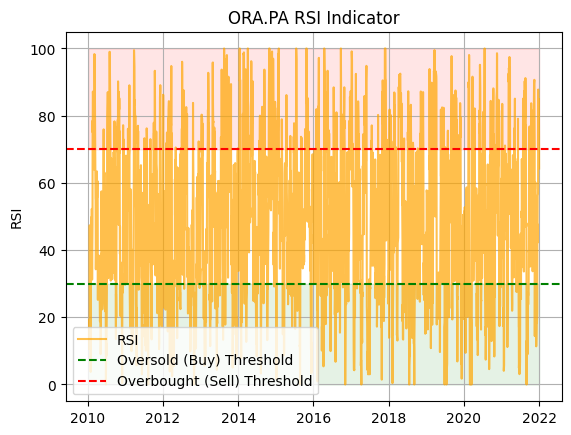

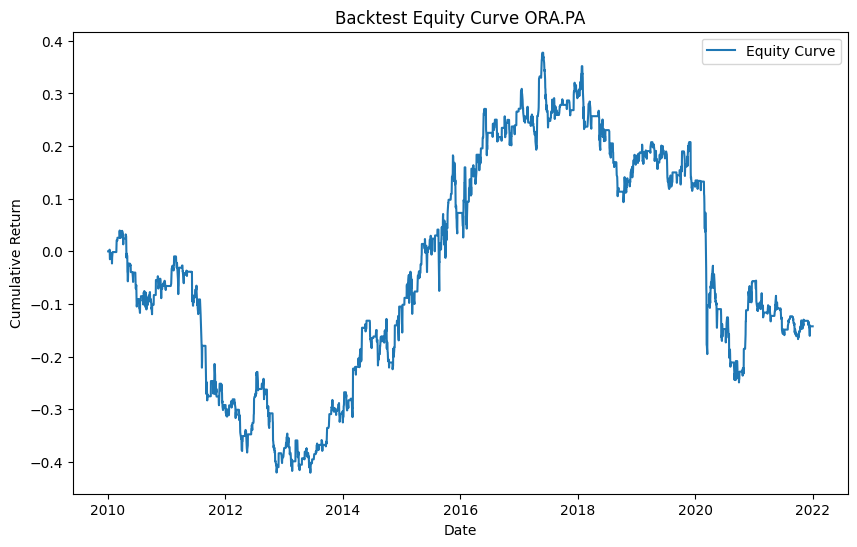

Total Return: -14.24%


In [106]:
df_I,trades=Strat_Outcome('ORA.PA','2010-01-01','2022-01-01',70,30,7)

In [107]:
df_I['Price MA'].head(20)

Date
2010-01-04    12.000000
2010-01-05    12.000000
2010-01-06    12.000000
2010-01-07    12.000000
2010-01-08    12.000000
2010-01-11    12.000000
2010-01-12    17.509286
2010-01-13    17.458572
2010-01-14    17.401429
2010-01-15    17.319286
2010-01-18    17.270000
2010-01-19    17.265000
2010-01-20    17.224286
2010-01-21    17.163571
2010-01-22    17.094286
2010-01-25    17.023572
2010-01-26    16.990714
2010-01-27    16.933572
2010-01-28    16.810000
2010-01-29    16.755000
Name: Price MA, dtype: float64

In [108]:
pd.DataFrame(np.array( df_I['Final Position'] != df_I['Position'] )).describe()

,0
count,3071
unique,2
top,False
freq,2292


In [109]:
trade_df=trades

In [110]:
trade_df["Profit"].value_counts()

Profit
1    160
0    130
Name: count, dtype: int64

# Machine Learning Optimization

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [112]:
trade_df

,Buy Date,Sell Date,Buy Price,Sell Price,Volume_Buy,Volume_Sell,Slope_Buy,Slope_Sell,PnL,Profit
0,2010-01-12,2010-01-19,17.350000,17.295000,7987409.0,9082056.0,0.590281,0.542041,-0.055000,0
1,2010-01-21,2010-01-26,16.924999,16.860001,9749081.0,9742325.0,-0.046199,-0.051811,-0.064999,0
2,2010-01-27,2010-02-01,16.700001,16.795000,9114874.0,9052016.0,-0.057194,-0.063980,0.094999,1
3,2010-02-24,2010-02-26,16.844999,17.225000,6186961.0,10721343.0,0.070459,0.060077,0.380001,1
4,2010-03-01,2010-03-03,17.360001,17.440001,8162585.0,6497294.0,0.054566,0.048673,0.080000,1
...,...,...,...,...,...,...,...,...,...,...
285,2021-10-12,2021-10-13,9.437000,9.403000,6917767.0,7614027.0,0.004918,0.007551,-0.034000,0
286,2021-10-15,2021-10-18,9.512000,9.486000,8073205.0,7191812.0,0.013878,0.014811,-0.026000,0
287,2021-10-21,2021-10-25,9.613000,9.605000,8778101.0,8071515.0,0.013908,0.019082,-0.008000,0
288,2021-11-08,2021-12-02,9.598000,9.302000,5071561.0,16491967.0,0.000306,-0.027474,-0.296000,0


In [113]:
ml_features = trade_df[['Buy Price','Volume_Buy','Volume_Sell','Slope_Buy','Slope_Sell']]
ml_target = trade_df['Profit']

In [114]:
print("Summary Statistics:")
print(trade_df.describe())

Summary Statistics:
                            Buy Date                      Sell Date  \
count                            290                            290   
mean   2015-12-02 18:42:12.413793024  2015-12-10 03:43:26.896551680   
min              2010-01-12 00:00:00            2010-01-19 00:00:00   
25%              2013-03-16 00:00:00            2013-03-20 12:00:00   
50%              2015-11-10 12:00:00            2015-11-14 12:00:00   
75%              2018-09-27 18:00:00            2018-10-02 12:00:00   
max              2021-12-14 00:00:00            2021-12-31 00:00:00   
std                              NaN                            NaN   

        Buy Price  Sell Price    Volume_Buy   Volume_Sell   Slope_Buy  \
count  290.000000  290.000000  2.900000e+02  2.900000e+02  290.000000   
mean    12.805917   12.808600  8.793237e+06  9.047645e+06    0.014228   
min      7.098000    7.206000  9.314530e+05  1.487407e+06   -0.320255   
25%     10.402750   10.406250  5.758948e+06  6.1

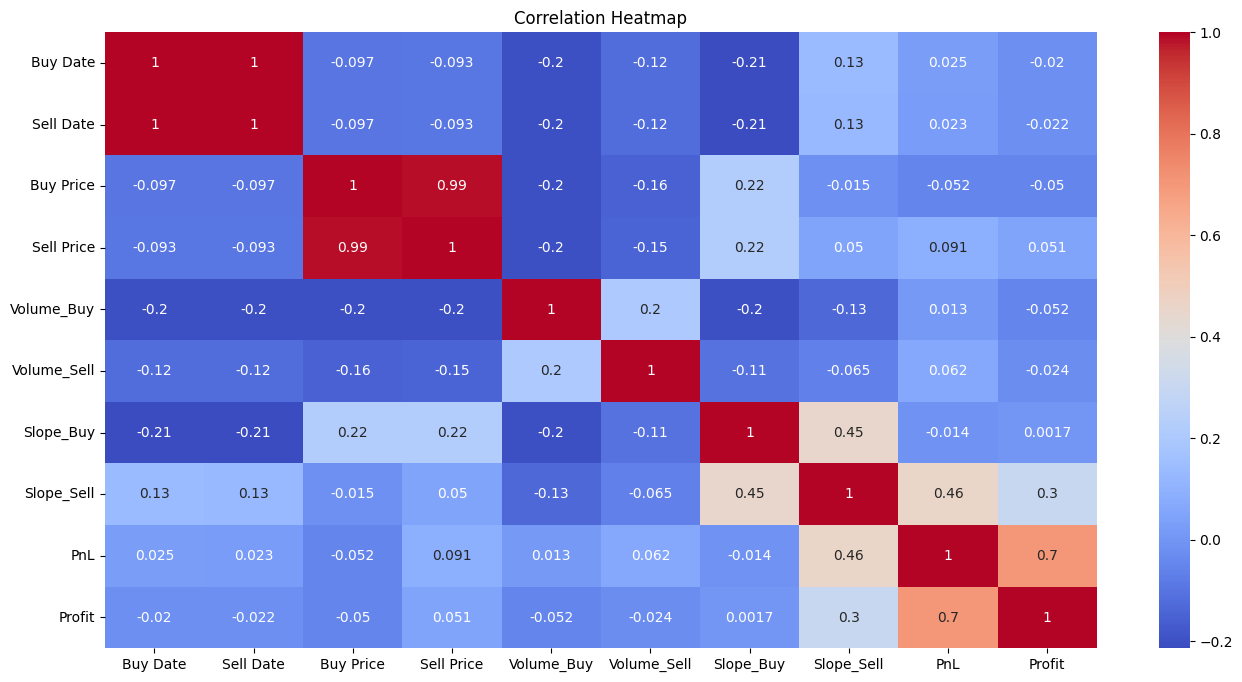

In [115]:
plt.figure(figsize=(16, 8))
sns.heatmap(trade_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


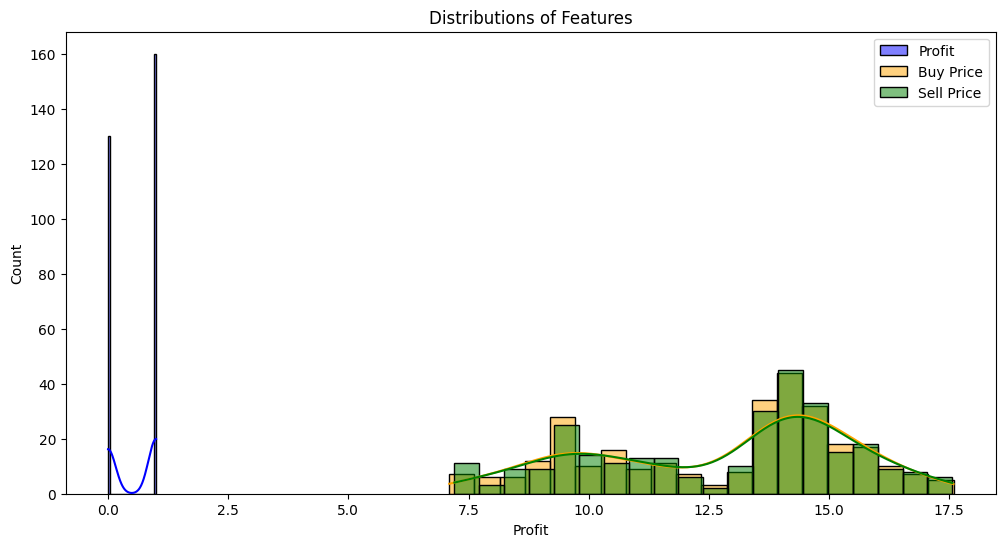

In [116]:
plt.figure(figsize=(12, 6))
sns.histplot(trade_df['Profit'], kde=True, bins=20, color='blue', label='Profit')
sns.histplot(trade_df['Buy Price'], kde=True, bins=20, color='orange', label='Buy Price')
sns.histplot(trade_df['Sell Price'], kde=True, bins=20, color='green', label='Sell Price')
plt.legend()
plt.title("Distributions of Features")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

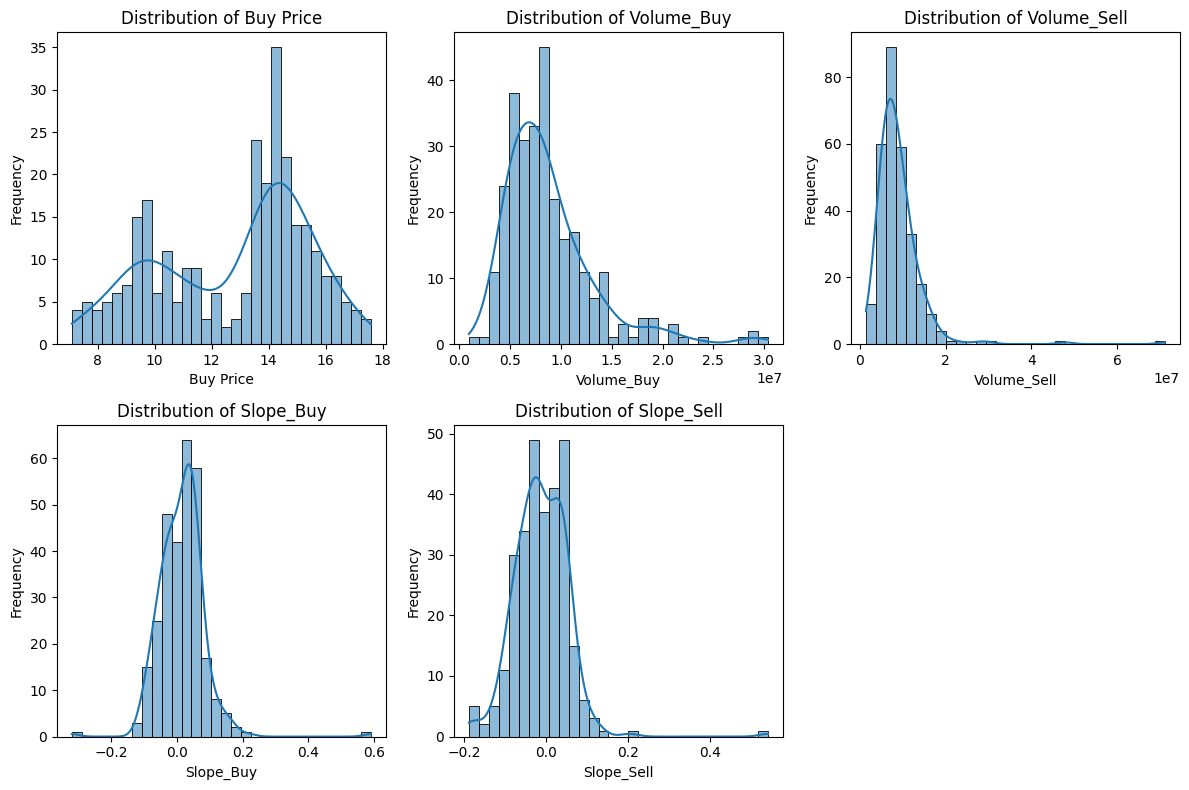

In [117]:
features = ['Buy Price', 'Volume_Buy', 'Volume_Sell', 'Slope_Buy', 'Slope_Sell']  

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(trade_df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

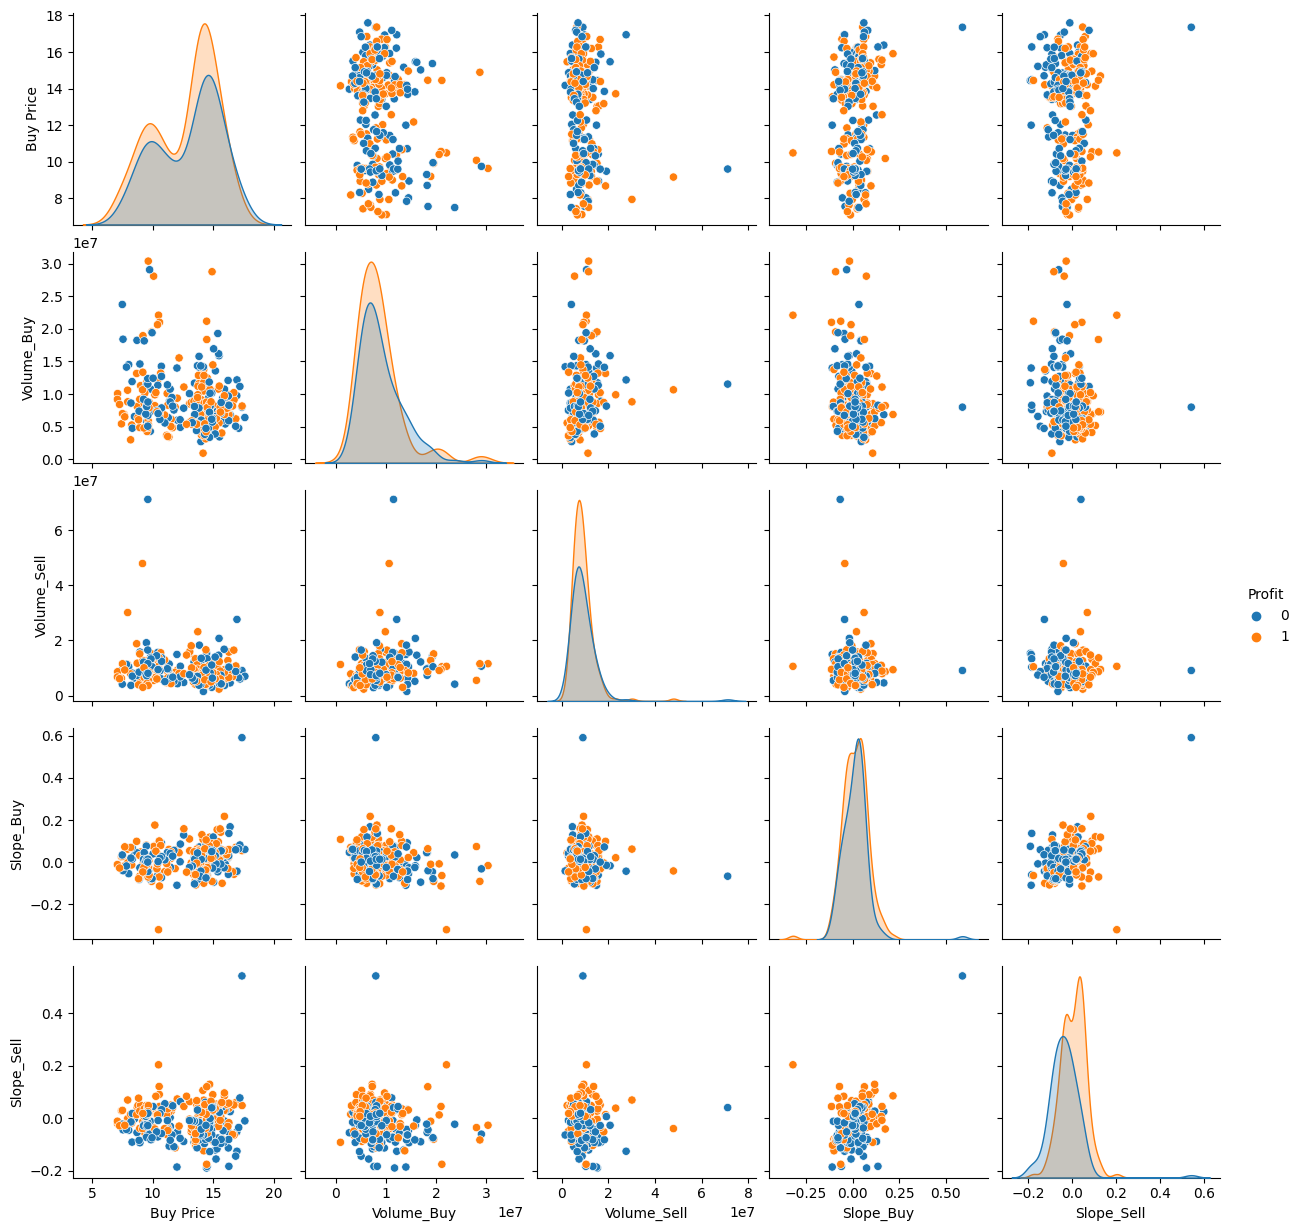

In [118]:
sns.pairplot(trade_df[['Buy Price','Volume_Buy','Volume_Sell','Slope_Buy','Slope_Sell','Profit']], hue='Profit')  # Update target_variable as needed
plt.show()


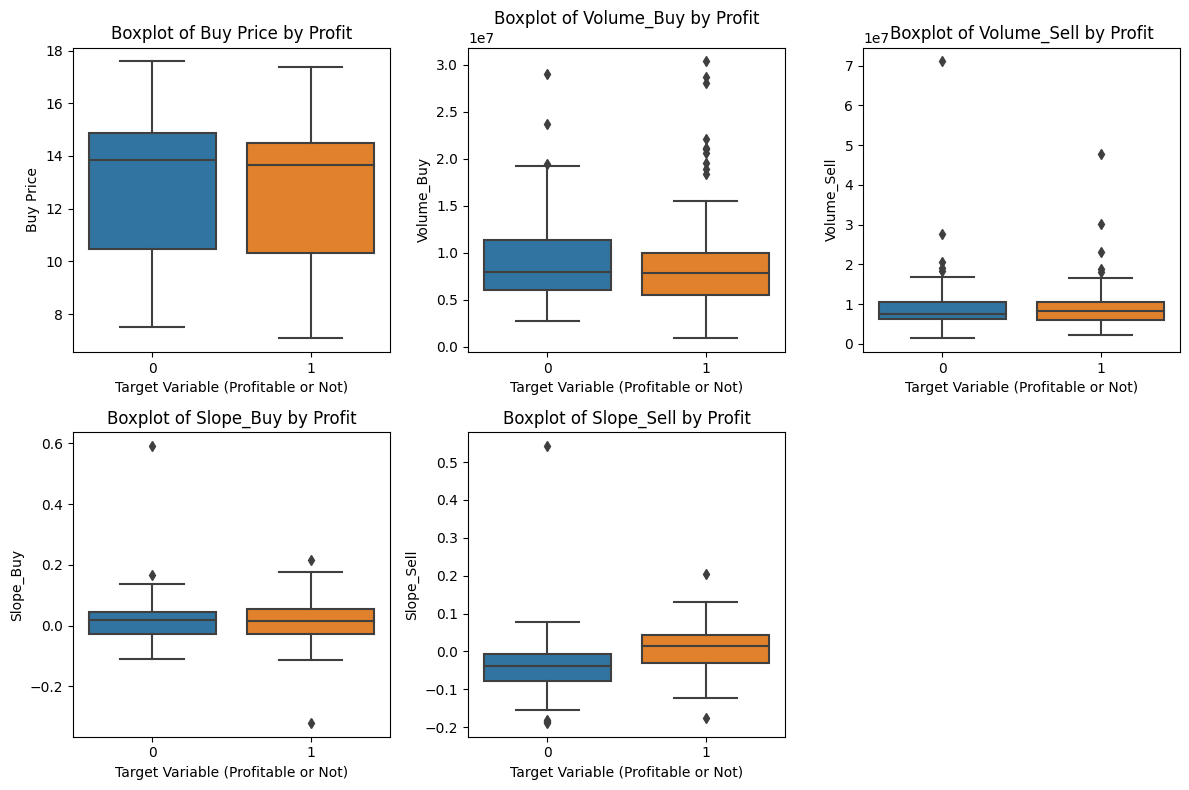

In [119]:
plt.figure(figsize=(12, 8))
features=['Buy Price','Volume_Buy','Volume_Sell','Slope_Buy','Slope_Sell']
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Profit', y=feature, data=trade_df)  
    plt.title(f'Boxplot of {feature} by Profit')
    plt.xlabel('Target Variable (Profitable or Not)')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


In [120]:
print("Missing Values:")
print(trade_df.isnull().sum())

Missing Values:
Buy Date       0
Sell Date      0
Buy Price      0
Sell Price     0
Volume_Buy     0
Volume_Sell    0
Slope_Buy      0
Slope_Sell     0
PnL            0
Profit         0
dtype: int64


In [121]:
scaler = MinMaxScaler()  
trade_df[['Buy Price','Volume_Buy','Volume_Sell']] = scaler.fit_transform(trade_df[['Buy Price','Volume_Buy','Volume_Sell']])

scalar train puis test
date transformation difference

In [122]:
ml_features = trade_df[['Buy Price','Volume_Buy','Volume_Sell','Slope_Buy','Slope_Sell']]
X_train, X_test, y_train, y_test = train_test_split(ml_features, ml_target, test_size=0.2, random_state=42)

#Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, log_preds))

#Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))

#SVM
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, svm_preds))

#Gradient boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_preds))

#KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)
print("k-NN Classification Report:")
print(classification_report(y_test, knn_preds))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.04      0.07        28
           1       0.52      0.97      0.67        30

    accuracy                           0.52        58
   macro avg       0.51      0.50      0.37        58
weighted avg       0.51      0.52      0.38        58

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        28
           1       0.74      0.83      0.78        30

    accuracy                           0.76        58
   macro avg       0.76      0.76      0.76        58
weighted avg       0.76      0.76      0.76        58

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.36      0.51        28
           1       0.62      0.97      0.75        30

    accuracy                           0.67        58
   macro avg       0.

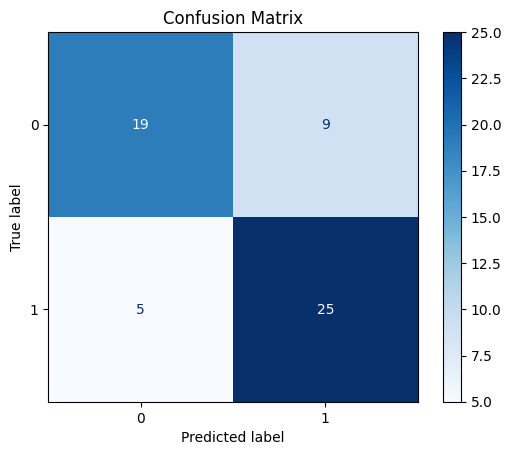

In [123]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = rf_model.predict(X_test)  
y_test = y_test  

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')  
plt.title("Confusion Matrix")
plt.show()


In [124]:
# c. Evaluation Metrics: ROC-AUC
rf_proba = rf_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, rf_proba)
print(f"Random Forest ROC-AUC Score: {auc_score:.2f}")

Random Forest ROC-AUC Score: 0.80


In [125]:
from sklearn.metrics import classification_report

# Prédictions sur le jeu d'entraînement et de test
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Affichage des performances
print("Performance sur le jeu d'entraînement:")
print(classification_report(y_train, y_train_pred))

print("Performance sur le jeu de test:")
print(classification_report(y_test, y_test_pred))


Performance sur le jeu d'entraînement:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       130

    accuracy                           1.00       232
   macro avg       1.00      1.00      1.00       232
weighted avg       1.00      1.00      1.00       232

Performance sur le jeu de test:
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        28
           1       0.74      0.83      0.78        30

    accuracy                           0.76        58
   macro avg       0.76      0.76      0.76        58
weighted avg       0.76      0.76      0.76        58



In [126]:
""""rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],

}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

best_rf_model = grid_search.best_estimator_
rf_preds = best_rf_model.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))"""

'"rf_model = RandomForestClassifier(random_state=42)\n\nparam_grid = {\n    \'n_estimators\': [50, 100, 200],\n    \'max_depth\': [None, 10, 20, 30, 40, 50],\n    \'min_samples_split\': [2, 5, 10, 20],\n    \'min_samples_leaf\': [1, 2, 4, 6, 8],\n\n}\n\ngrid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,\n                           cv=5, scoring=\'accuracy\', verbose=2, n_jobs=-1)\n\ngrid_search.fit(X_train, y_train)\n\nprint("Best Parameters:", grid_search.best_params_)\nprint("Best Cross-Validation Accuracy:", grid_search.best_score_)\n\nbest_rf_model = grid_search.best_estimator_\nrf_preds = best_rf_model.predict(X_test)\n\nprint("Random Forest Classification Report:")\nprint(classification_report(y_test, rf_preds))'

In [127]:
def apply_ml_to_trades(trade_df, model, scaler, threshold=0.5):
    """
    Apply machine learning predictions to the trade dataframe and filter profitable trades.
    """
    #features used during ML training
    ml_features = trade_df[['Buy Price', 'Volume_Buy', 'Volume_Sell', 'Slope_Buy', 'Slope_Sell']].fillna(0)
    
    # Scale features
    
    ml_features[['Buy Price','Volume_Buy','Volume_Sell']] = scaler.transform(trade_df[['Buy Price','Volume_Buy','Volume_Sell']])
    ml_features_scaled = ml_features
    
    predictions = model.predict(ml_features_scaled)
    probabilities = model.predict_proba(ml_features_scaled)[:, 1]  # Probability of being in class 1 (profitable)
    
    # Threshold
    trade_df['ML_Prediction'] = (probabilities >= threshold).astype(int)
    
    # Filter 
    trade_df_ml = trade_df[trade_df['ML_Prediction'] == 1]
    
    return trade_df_ml


[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_30/756823900.py:13: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  x=int(df['Volume'].mean())
/tmp/ipykernel_30/756823900.py:30: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  x=int(df['Close'].mean())
[*********************100%***********************]  1 of 1 completed


Position
 0.0    380
-1.0     66
 1.0     65
 NaN      1
Name: count, dtype: int64
float64
[nan  0.  1. -1.]


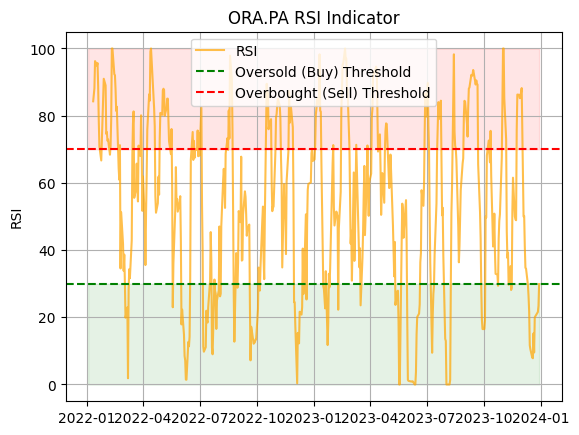

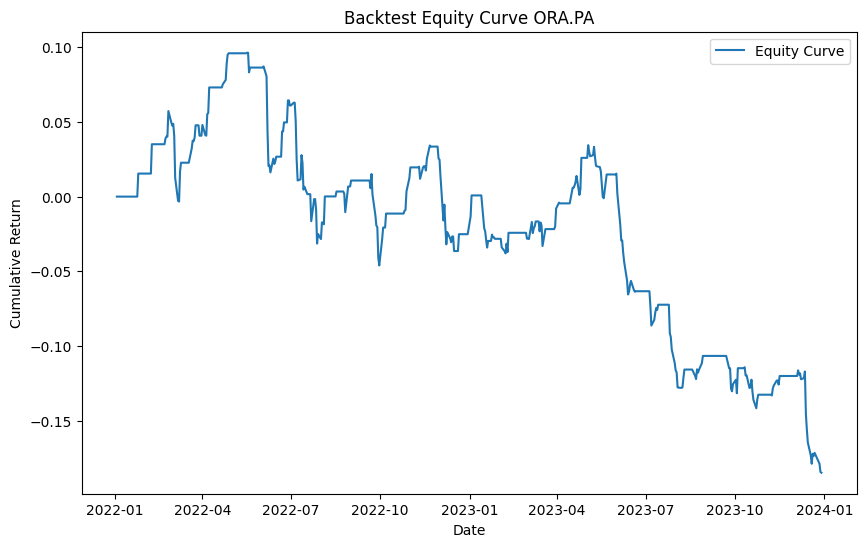

Total Return: -18.42%


In [128]:
df_I,trade_df=Strat_Outcome('ORA.PA','2022-01-01','2024-01-01',70,30,7)

In [129]:
trade_df.head(10)

,Buy Date,Sell Date,Buy Price,Sell Price,Volume_Buy,Volume_Sell,Slope_Buy,Slope_Sell,PnL,Profit
0,2022-01-24,2022-01-25,9.986,10.140,16216100.0,13442790.0,0.043980,0.033429,0.154000,1
1,2022-02-07,2022-02-08,10.554,10.758,7001204.0,15297589.0,0.051321,0.046117,0.204000,1
2,2022-02-21,2022-02-23,10.946,11.000,8461833.0,7672068.0,0.038306,0.021755,0.054000,1
3,2022-02-24,2022-03-10,10.716,10.536,19543440.0,10922576.0,0.012969,-0.063816,-0.179999,0
4,2022-03-18,2022-03-25,10.542,10.800,21491186.0,5078832.0,0.020714,0.017000,0.258000,1
5,2022-03-28,2022-03-29,10.844,10.772,7486554.0,6473095.0,0.018745,0.020867,-0.072000,0
6,2022-03-31,2022-04-08,10.704,11.036,5864346.0,6258061.0,0.021245,0.004969,0.332000,1
7,2022-04-21,2022-04-28,11.084,11.320,6230393.0,6984003.0,0.050612,0.008786,0.236000,1
8,2022-05-16,2022-05-17,11.722,11.726,6113818.0,5377124.0,0.040398,0.033643,0.004000,1
9,2022-05-18,2022-05-20,11.688,11.582,5867333.0,7577498.0,0.025051,0.005827,-0.106000,0


In [130]:
trade_df_ml=apply_ml_to_trades(trade_df, rf_model, scaler, threshold=0.5)

In [131]:
trade_df_ml

,Buy Date,Sell Date,Buy Price,Sell Price,Volume_Buy,Volume_Sell,Slope_Buy,Slope_Sell,PnL,Profit,ML_Prediction
0,2022-01-24,2022-01-25,9.986,10.140,16216100.0,13442790.0,0.043980,0.033429,0.154000,1,1
1,2022-02-07,2022-02-08,10.554,10.758,7001204.0,15297589.0,0.051321,0.046117,0.204000,1,1
2,2022-02-21,2022-02-23,10.946,11.000,8461833.0,7672068.0,0.038306,0.021755,0.054000,1,1
5,2022-03-28,2022-03-29,10.844,10.772,7486554.0,6473095.0,0.018745,0.020867,-0.072000,0,1
7,2022-04-21,2022-04-28,11.084,11.320,6230393.0,6984003.0,0.050612,0.008786,0.236000,1,1
8,2022-05-16,2022-05-17,11.722,11.726,6113818.0,5377124.0,0.040398,0.033643,0.004000,1,1
12,2022-06-23,2022-06-24,11.042,11.106,6228557.0,8608870.0,0.017327,0.024684,0.064000,1,1
13,2022-06-27,2022-06-28,11.134,11.290,4513437.0,6264223.0,0.027398,0.030990,0.156000,1,1
14,2022-06-29,2022-06-30,11.256,11.220,7646235.0,7355909.0,0.033990,0.036143,-0.035999,0,1
15,2022-07-01,2022-07-04,11.280,11.300,5601193.0,4926599.0,0.036520,0.036092,0.020000,1,1


In [132]:
def BackTest_with_ml(df, trade_df_ml):
    """
    Perform backtesting using only trades predicted as profitable by ML.
    """
    initial_cash = 10000  
    cash = initial_cash   
    shares = 0            
    portfolio_value = []  
    equity_curve = []     

    trades = []  # List of trades performed (buy/sell)

    
    for _, trade in trade_df_ml.iterrows():
        if trade['ML_Prediction'] == 1:  
            trade_date = trade['Buy Date']
            sell_date = trade['Sell Date']
            buy_price = trade['Buy Price']
            sell_price = trade['Sell Price']

            # Execute Buy
            if cash >= buy_price:  # Ensure we have enough cash to buy
                cash -= buy_price  # Decrease cash by the buy price
                shares += 1  # Buy one share (as per your original logic)
                trades.append({'Date': trade_date, 'Type': 'Buy', 'Price': buy_price})
            
            # Execute Sell
            if shares > 0:  # Ensure we have shares to sell
                cash += sell_price  # Add cash from selling the share
                shares -= 1  # Decrease shares after selling
                trades.append({'Date': sell_date, 'Type': 'Sell', 'Price': sell_price})
            
            # portfolio value (cash + value of remaining shares)
            portfolio_value_today = cash + shares * sell_price  # Portfolio value
            portfolio_value.append(portfolio_value_today)  # Add today's portfolio value
            equity_curve.append((portfolio_value_today - initial_cash) / initial_cash)  # Calculate the return

    
    # Final portfolio stats
    final_value = portfolio_value[-1] if portfolio_value else initial_cash
    total_return = (final_value - initial_cash) / initial_cash

    # Plot the equity curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(equity_curve)), equity_curve, label='Equity Curve (ML Filtered)')
    plt.title('Backtest Equity Curve (ML Filtered)')
    plt.xlabel('Trade Index')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.show()

    print(f'Total Return with ML Filtering: {total_return * 100:.2f}%')

    return total_return, trades


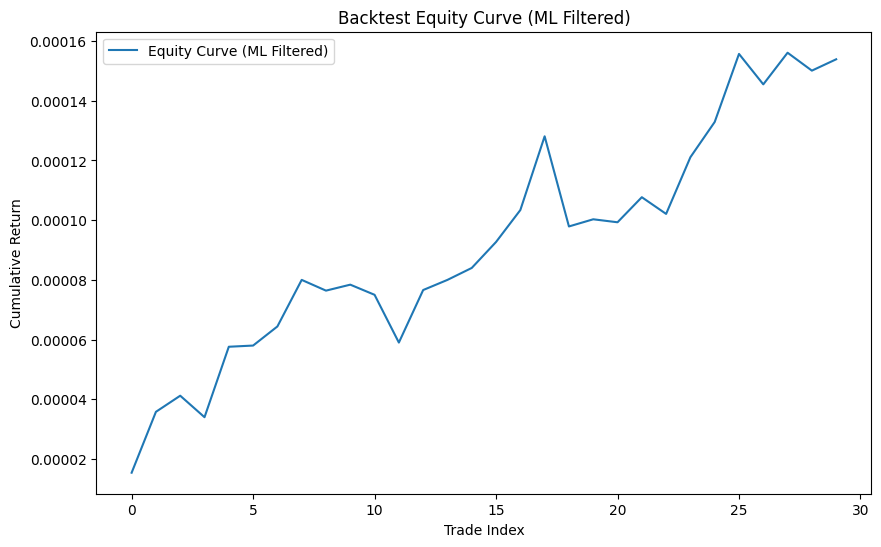

Total Return with ML Filtering: 0.02%


In [133]:
TR_ml,trades=BackTest_with_ml(df_I, trade_df_ml)